<center>
    <hr>
    <h1>6A</h1>
    <p>Simple Naive Bayes Classification</p>
    <hr>
</center>

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import *
import matplotlib.pyplot as plt

path = "iris.csv"
df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
null_val= df.isnull().sum()
null_val

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:
print(df['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
#drop unnecessory columns.

df.drop(columns="Id",inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

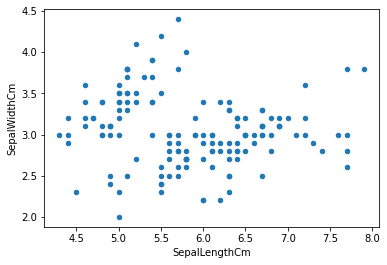

In [17]:
plt = df.plot(kind='scatter', x="SepalLengthCm", y="SepalWidthCm")
plt

In [18]:
X = df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df[['Species']]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, random_state = 0)

xtrain.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [20]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
 
print (xtrain[0:10, :])

[[ 0.01543995 -0.11925475  0.22512685  0.35638175]
 [-0.09984503 -1.04039491  0.11355956 -0.02864805]
 [ 1.05300481 -0.11925475  0.95031423  1.12644135]
 [-1.36797986  0.34131533 -1.39259884 -1.31208072]
 [ 1.1682898   0.11103029  0.72717965  1.38312788]
 [-1.0221249   1.03217045 -1.2252479  -0.79870765]
 [-0.56098497  1.49274053 -1.28103155 -1.31208072]
 [-1.0221249  -2.42210516 -0.16535866 -0.28533458]
 [ 0.70714986 -0.11925475  0.95031423  0.74141155]
 [ 0.93771983  0.57160037  1.06188152  1.63981441]]


<center>
    <h3>Gaussian NB</h3>
</center>

In [28]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(xtrain, ytrain)

C:\Users\omkar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [29]:
y_pred = classifier.predict(xtest)

print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


In [ ]:
# # Summary of the predictions made by the classifier

# print(classification_report(ytest, y_pred))
# print(confusion_matrix(ytest, y_pred))

# # Accuracy score
# from sklearn.metrics import accuracy_score
# print('accuracy is',accuracy_score(y_pred,ytest))


<center>
    <hr>
    <h1>6B</h1>
    <p>Confusion Matrix</p>
    <hr>
</center>

In [146]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy :", accuracy_score(ytest, y_pred))

Accuracy : 0.89


In [151]:
from sklearn.metrics import precision_score
print ("Precision :", precision_score(ytest, y_pred, average='micro'))

Precision : 1.0


In [154]:
from sklearn.metrics import recall_score
print ("Recall :", recall_score(ytest, y_pred, average='micro'))

Recall : 1.0


In [161]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score
cm = confusion_matrix(ytest, y_pred)
print(cm)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
